In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

onrate = 1e5
offrate = 10
reverserate = 1e-9

def reactionrates(y): # ditch the useless argument t now that we aren't using solve_ivp
    # converting molecule number into molarity:
    ym = y / (volume * avogadroconstant)
    # unpacking y into individual species:
    c, kk, kkc, kckc, kckc286, kc286kc286, kkc286, k306kc, k306k, k306kc286, k306k306 = ym
    # calculate the rate of each reaction:
    r1f = onrate * kk * c
    r1r = offrate * kkc
    r2f = onrate * kkc * c
    r2r = offrate * kckc
    r3f = rate286 * kckc
    r3r = reverserate * kckc286
    r4f = rate286 * kckc286
    r4r = reverserate * kc286kc286
    r5f = offrate * kckc286
    r5r = onrate * kkc286 * c
    r6f = rate306 * kkc
    r6r = reverserate * k306kc
    r7f = offrate * k306kc
    r7r = onrate * k306k * c
    r8f = rate306 * kkc286
    r8r = reverserate * k306kc286
    r9f = ratecis306 * kk
    r9r = reverserate * k306k
    r10f = ratecis306 * k306k
    r10r = reverserate * k306k306
    r11f = ratecis306 * kkc
    r11r = reverserate * k306kc
    r12f = ratecis306 * kkc286
    r12r = reverserate * k306kc286
    # convert the rates back into molecule numbers:
    return np.array([r1f, r1r, r2f, r2r, r3f, r3r, r4f, r4r, r5f, r5r, r6f, r6r, r7f, r7r, r8f, r8r,
                     r9f, r9r, r10f, r10r, r11f, r11r, r12f, r12r]) * (volume * avogadroconstant)

# Each row is the change in number of each species upon a reaction occuring:
reactioneffects = np.array([[-1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                           [1, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0],
                           [-1, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0],
                           [1, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0],
                           [1, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0],
                           [-1, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0],
                           [0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0],
                           [0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0],
                           [1, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0],
                           [-1, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0],
                           [0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0],
                           [0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0],
                           [0, -1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                           [0, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1],
                           [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1],
                           [0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0],
                           [0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0],
                           [0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0]])

# A reasonable cell volume:
volume = 1e-12
avogadroconstant = 6.02214076e23

y0 = np.zeros(11, dtype = int)
y0[0] = int(1e-4 * volume * avogadroconstant) # initial number of CaM (could also do poisson distribution)
y0[1] = int(1e-9 * volume * avogadroconstant) # initial number of CaMKII
print(y0)

[60221407      602        0        0        0        0        0        0
        0        0        0]


In [2]:
indices = np.arange(24) # a helpful array for using np.random.choice

# A single Gillespie algorithm step
def gillespie_step(y):
    rates = reactionrates(y)
    totalrate = np.sum(rates)
    interval = np.random.exponential(1 / totalrate) # draw the time interval, see Gillespie JPC 1977
    draw = np.random.choice(indices, p = rates / totalrate) # pick a reaction according to the probabilities
    return y + reactioneffects[draw], interval # apply the reaction, AKA add the correct row from reactioneffects

Text(0, 0.5, 'number of molecules')

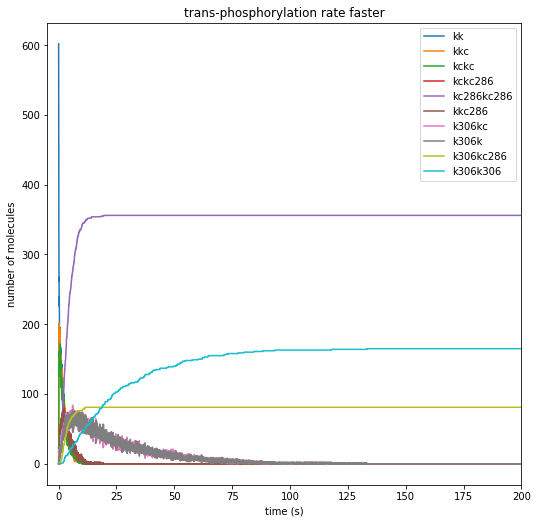

In [3]:
# Parameter set 1
rate286 = 1
rate306 = 0.1
ratecis306 = 0.1

t = 0
t_eval = [0.0] # t values for plotting
y_eval = [y0] # y values for plotting
y = np.copy(y0)

while(t <= 200):
    y, interval = gillespie_step(y)
    t += interval
    if t - t_eval[-1] >= 0.005: # we'll save samples spaced at least 0.005 s apart
        t_eval.append(t)
        y_eval.append(y)

plt.figure(figsize = (8.5, 8.5))
plt.plot(t_eval, np.array(y_eval)[:,1:]) # plotting all but free CaM
plt.legend(["kk","kkc","kckc","kckc286", "kc286kc286", "kkc286", "k306kc", "k306k", "k306kc286", "k306k306"])
plt.xlim((-5, 200))
plt.title("trans-phosphorylation rate faster")
plt.xlabel("time (s)")
plt.ylabel("number of molecules")

Text(0, 0.5, 'number of molecules')

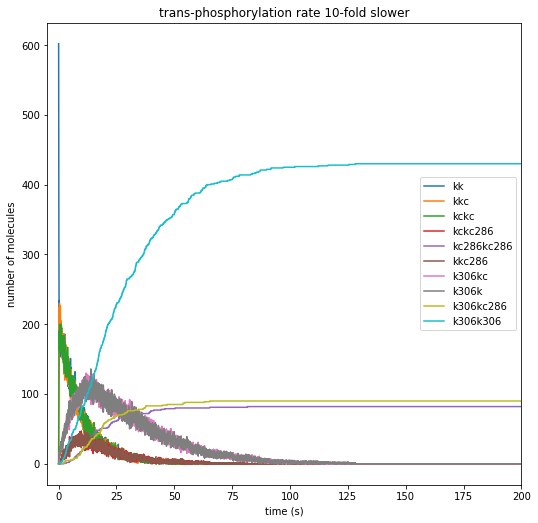

In [4]:
# Parameter set 2
rate286 = 0.1
rate306 = 0.01
ratecis306 = 0.1

t = 0
t_eval = [0.0]
y_eval = [y0]
y = np.copy(y0)

while(t <= 200):
    y, interval = gillespie_step(y)
    t += interval
    if t - t_eval[-1] >= 0.005:
        t_eval.append(t)
        y_eval.append(y)

plt.figure(figsize = (8.5, 8.5))
plt.plot(t_eval, np.array(y_eval)[:,1:])
plt.legend(["kk","kkc","kckc","kckc286", "kc286kc286", "kkc286", "k306kc", "k306k", "k306kc286", "k306k306"])
plt.xlim((-5, 200))
plt.title("trans-phosphorylation rate 10-fold slower")
plt.xlabel("time (s)")
plt.ylabel("number of molecules")

Text(0, 0.5, 'number of molecules')

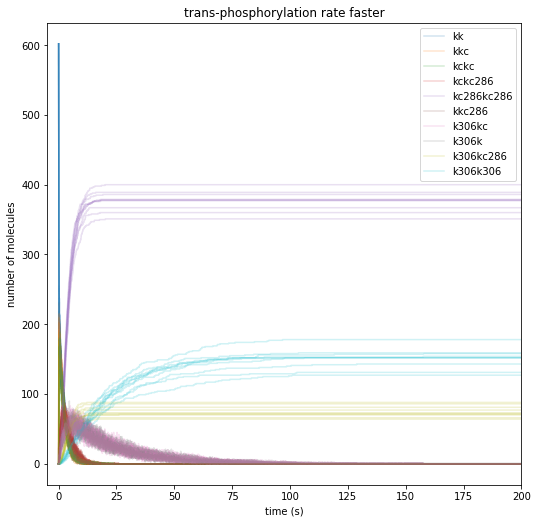

In [5]:
# Parameter set 1, 10 trajectories
rate286 = 1
rate306 = 0.1
ratecis306 = 0.1

plt.figure(figsize = (8.5, 8.5))

for i in range(10):
    t = 0
    t_eval = [0.0]
    y_eval = [y0]
    y = np.copy(y0)
    while(t <= 200):
        y, interval = gillespie_step(y)
        t += interval
        if t - t_eval[-1] >= 0.005:
            t_eval.append(t)
            y_eval.append(y)
    plt.plot(t_eval, np.array(y_eval)[:,1:], alpha = 0.2)
    
plt.legend(["kk","kkc","kckc","kckc286", "kc286kc286", "kkc286", "k306kc", "k306k", "k306kc286", "k306k306"])
plt.xlim((-5, 200))
plt.title("trans-phosphorylation rate faster")
plt.xlabel("time (s)")
plt.ylabel("number of molecules")

In [6]:
# We can see that generating many trajectories becomes quite slow. Let's speed up our functions using numba:
from numba import jit
# Note: you'll need to install numba into this environment with conda install -c conda-forge numba
# if you haven't already

# All we need to do is add the jit (just-in-time) decorator to our functions,
# and they'll be compiled before running:
@jit(nopython = True)
def reactionrates(y): # ditch the useless argument t now that we aren't using solve_ivp
    # converting molecule number into molarity:
    ym = y / (volume * avogadroconstant)
    # unpacking y into individual species:
    c, kk, kkc, kckc, kckc286, kc286kc286, kkc286, k306kc, k306k, k306kc286, k306k306 = ym
    # calculate the rate of each reaction:
    r1f = onrate * kk * c
    r1r = offrate * kkc
    r2f = onrate * kkc * c
    r2r = offrate * kckc
    r3f = rate286 * kckc
    r3r = reverserate * kckc286
    r4f = rate286 * kckc286
    r4r = reverserate * kc286kc286
    r5f = offrate * kckc286
    r5r = onrate * kkc286 * c
    r6f = rate306 * kkc
    r6r = reverserate * k306kc
    r7f = offrate * k306kc
    r7r = onrate * k306k * c
    r8f = rate306 * kkc286
    r8r = reverserate * k306kc286
    r9f = ratecis306 * kk
    r9r = reverserate * k306k
    r10f = ratecis306 * k306k
    r10r = reverserate * k306k306
    r11f = ratecis306 * kkc
    r11r = reverserate * k306kc
    r12f = ratecis306 * kkc286
    r12r = reverserate * k306kc286
    # convert the rates back into molecule numbers:
    return np.array([r1f, r1r, r2f, r2r, r3f, r3r, r4f, r4r, r5f, r5r, r6f, r6r, r7f, r7r, r8f, r8r,
                     r9f, r9r, r10f, r10r, r11f, r11r, r12f, r12r]) * (volume * avogadroconstant)

Text(0, 0.5, 'number of molecules')

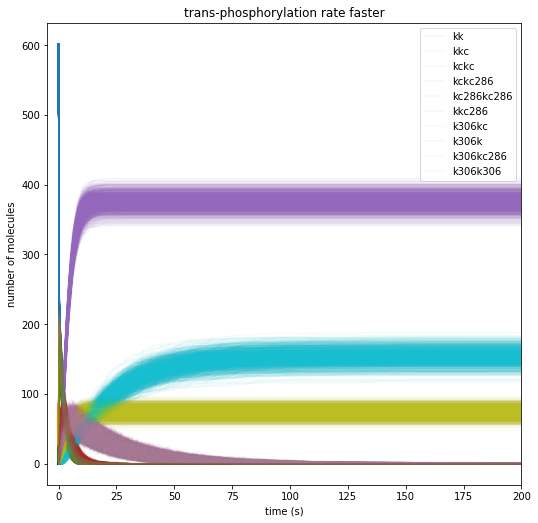

In [7]:
# Parameter set 1, 1000 trajectories
rate286 = 1
rate306 = 0.1
ratecis306 = 0.1

plt.figure(figsize = (8.5, 8.5))

for i in range(1000):
    t = 0
    t_eval = [0.0]
    y_eval = [y0]
    y = np.copy(y0)
    while(t <= 200):
        y, interval = gillespie_step(y)
        t += interval
        if t - t_eval[-1] >= 0.005:
            t_eval.append(t)
            y_eval.append(y)
    plt.plot(t_eval, np.array(y_eval)[:,1:], alpha = 0.05)
    
plt.legend(["kk","kkc","kckc","kckc286", "kc286kc286", "kkc286", "k306kc", "k306k", "k306kc286", "k306k306"])
plt.xlim((-5, 200))
plt.title("trans-phosphorylation rate faster")
plt.xlabel("time (s)")
plt.ylabel("number of molecules")